## SVM Exercise

In [1]:
# import pandas
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

In [11]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
irisdata.loc[:, ['Class']].shape

(150, 1)

* create X, y

In [35]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1,dtype=np.int64)
irisdata.Class = oe.fit_transform(irisdata.loc[:, ['Class']])


In [36]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
irisdata.Class.unique()

array([0, 1, 2], dtype=int64)

In [38]:
X,y= irisdata.drop(['Class'],axis=1), irisdata['Class']


* import train_test_split and split data

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

* import SVC from sklearn and use Polynomial kernel

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64

In [43]:
from sklearn.svm import SVC

* fit training data

In [44]:
clf_model = SVC(kernel='liner')
clf_model.fit(X_train,y_train)

SVC()

* predict X_test

In [45]:
y_pred = clf_model.predict(X_test)

* import confusion matrix from sklearn and print values

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


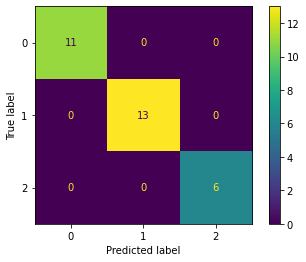

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_model, X_test,y_test)

* create SVC with rbf kernel

In [48]:
clf_rbf = SVC()

* fit training data

In [49]:
clf_rbf.fit(X_train,y_train)

SVC()

* predict X_test

In [52]:
rbf_pred  = clf_rbf.predict(X_test)

* print confusion matrix

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


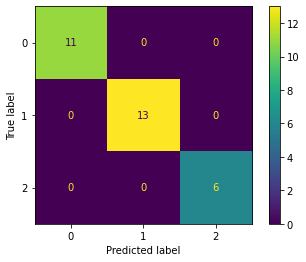

In [53]:
plot_confusion_matrix(clf_rbf, X_test,y_test)

* create SVC with sigmoid kernel

In [54]:
clf_sigmoid = SVC(kernel='sigmoid')

* fit training data

In [56]:
clf_sigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid')

* predict X_test

In [57]:
sigmoid_pred  = clf_rbf.predict(X_test)

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


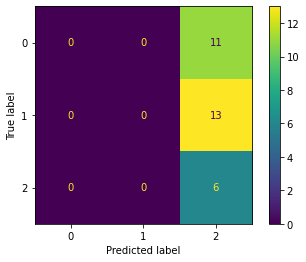

In [58]:
plot_confusion_matrix(clf_sigmoid, X_test,y_test)

#### Q: Which kernel was the most accurate on the testing set?

### Both the linear and rbf